### Getting started

# Numpy Section

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
df = pd.read_csv('weather_2020-11.csv')

### Preparing function for DRY (Dont repeat yourself)

In [5]:
from termcolor import colored
# Why not get a good visual?
def printer(label, array):
    array = array.astype(float)
    min_val = np.nanmin(array)
    max_val = np.nanmax(array)
    median_val = np.nanmedian(array)

    print(colored("="*40, "cyan"))
    print(colored(f"   {label} Statistics", "cyan"))
    print(colored("="*40, "cyan"))
    print(colored("  Minimum:", "green"), min_val)
    print(colored("  Maximum:", "yellow"), max_val)
    print(colored("  Median:", "magenta"), median_val)
    print(colored("="*40, "cyan"))

In [6]:
# Extract hour
df['Time'] = pd.to_datetime(df['Time'])

# Extract the hour component
df['Hour'] = df['Time'].dt.hour

In [7]:
def maxHourFinder(label,h,v):
    hourVal = np.array([h, v])
    max_temp_index = np.argmax(v)
    max_hour = h[max_temp_index]
    max_temp = v[max_temp_index] 
    print("Hour when maximum",label,"occurred:", max_hour)

## Temperature average

In [8]:
ta = df[df['ParameterName'].str.contains('TA_PT1H')]
parameter_values = ta['ParameterValue'].to_numpy()

printer("Temperature", parameter_values)

parameter_hours = ta['Hour'].to_numpy()
maxHourFinder("temperature",parameter_hours,parameter_values)

   Temperature Statistics
  Minimum: -9.1
  Maximum: 11.1
  Median: 2.7
Hour when maximum temperature occurred: 18


## Wind Speed

In [9]:
ta = df[df['ParameterName'].str.contains('WS_PT1H')]
parameter_values = ta['ParameterValue'].to_numpy()

printer("Wind Speed", parameter_values)

parameter_hours = ta['Hour'].to_numpy()
maxHourFinder("wind speed",parameter_hours,parameter_values)

   Wind Speed Statistics
  Minimum: 0.1
  Maximum: 12.3
  Median: 3.7
Hour when maximum wind speed occurred: 13


## Relative Humidity

In [10]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return np.nan  #Removing strings

In [11]:
ta = df[df['ParameterName'].str.contains('RH_PT1H')]
parameter_values = ta['ParameterValue'].to_numpy()
printer("Relative Humidity", np.array([convert_to_float(value) for value in parameter_values]))

parameter_hours = ta['Hour'].to_numpy()
maxHourFinder("temperature",parameter_hours,np.array([convert_to_float(value) for value in parameter_values]))

   Relative Humidity Statistics
  Minimum: 61.0
  Maximum: 100.0
  Median: 89.0
Hour when maximum temperature occurred: 20


## Wind Direction

In [12]:
ta = df[df['ParameterName'].str.contains('WD_PT1H')]
parameter_values = ta['ParameterValue'].to_numpy()

printer('Wind Direction', parameter_values)

parameter_hours = ta['Hour'].to_numpy()
maxHourFinder("wind speed",parameter_hours,parameter_values)

   Wind Direction Statistics
  Minimum: 4.0
  Maximum: 359.0
  Median: 188.0
Hour when maximum wind speed occurred: 16


## Precipitation Amount

In [13]:
import warnings

ta = df[df['ParameterName'].str.contains('PRA_PT1H')]
parameter_values = ta['ParameterValue'].to_numpy()

#Since PRA values holds NaNs only
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    printer("Precipitation Amount", np.array([convert_to_float(value) for value in parameter_values]))

parameter_hours = ta['Hour'].to_numpy()
maxHourFinder("temperature",parameter_hours,np.array([convert_to_float(value) for value in parameter_values]))


   Precipitation Amount Statistics
  Minimum: nan
  Maximum: nan
  Median: nan
Hour when maximum temperature occurred: 0


## Precipitation Intensity

In [14]:
ta = df[df['ParameterName'].str.contains('PRI_PT1H')]
parameter_values = ta['ParameterValue'].to_numpy()
#Since PRI values holds NaNs only
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    printer("Precipitation Intensity", np.array([convert_to_float(value) for value in parameter_values]))
    
parameter_hours = ta['Hour'].to_numpy()
maxHourFinder("temperature",parameter_hours,np.array([convert_to_float(value) for value in parameter_values]))

   Precipitation Intensity Statistics
  Minimum: nan
  Maximum: nan
  Median: nan
Hour when maximum temperature occurred: 0


## Most Significant Weather Code

In [15]:
ta = df[df['ParameterName'].str.contains('WAWA_PT1H')]
parameter_values = ta['ParameterValue'].to_numpy()
#Since WAWA values holds NaNs and str only
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    printer("Precipitation Intensity", np.array([convert_to_float(value) for value in parameter_values]))
    
parameter_hours = ta['Hour'].to_numpy()
maxHourFinder("temperature",parameter_hours,np.array([convert_to_float(value) for value in parameter_values]))

   Precipitation Intensity Statistics
  Minimum: nan
  Maximum: nan
  Median: nan
Hour when maximum temperature occurred: 0


# Matplotlib Visualization

In [16]:
# Extracting minimum temperature values
ta_min = df[df['ParameterName'] == 'TA_PT1H_MIN']
minparameter_values = ta_min['ParameterValue'].astype(float).to_numpy()

# Extracting maximum temperature values
ta_max = df[df['ParameterName'] == 'TA_PT1H_MAX']
maxparameter_values = ta_max['ParameterValue'].astype(float).to_numpy()

# Extracting average temperature values
ta_avg = df[df['ParameterName'] == 'TA_PT1H_AVG']
avgparameter_values = ta_avg['ParameterValue'].astype(float).to_numpy()

# Extracting average relative humidity values
rh_avg = df[df['ParameterName'] == 'RH_PT1H_AVG']
rh_avg_values = rh_avg['ParameterValue'].astype(float).to_numpy()

# Extracting average wind speed values
ws_avg = df[df['ParameterName'] == 'WS_PT1H_AVG']
ws_avg_values = ws_avg['ParameterValue'].astype(float).to_numpy()

# Extracting maximum wind speed values
ws_max = df[df['ParameterName'] == 'WS_PT1H_MAX']
ws_max_values = ws_max['ParameterValue'].astype(float).to_numpy()

# Extracting minimum wind speed values
ws_min = df[df['ParameterName'] == 'WS_PT1H_MIN']
ws_min_values = ws_min['ParameterValue'].astype(float).to_numpy()

# Extracting average wind direction values
wd_avg = df[df['ParameterName'] == 'WD_PT1H_AVG']
wd_avg_values = wd_avg['ParameterValue'].astype(float).to_numpy()

# Extracting precipitation accumulation values
pra_acc = df[df['ParameterName'] == 'PRA_PT1H_ACC']
pra_acc_values = pra_acc['ParameterValue'].astype(float).to_numpy()

# Extracting maximum precipitation intensity values
pri_max = df[df['ParameterName'] == 'PRI_PT1H_MAX']
pri_max_values = pri_max['ParameterValue'].astype(float).to_numpy()

# Extracting average precipitation values
pa_avg = df[df['ParameterName'] == 'PA_PT1H_AVG']
pa_avg_values = pa_avg['ParameterValue'].astype(float).to_numpy()

# Extracting weather warning rank values
wawa_rank = df[df['ParameterName'] == 'WAWA_PT1H_RANK']
wawa_rank_values = wawa_rank['ParameterValue'].astype(float).to_numpy()


ValueError: could not convert string to float: 'test'

(array([  4.,   7.,  19.,  70., 140., 124., 131., 105.,  57.,  40.]),
 array([-8. , -6.2, -4.4, -2.6, -0.8,  1. ,  2.8,  4.6,  6.4,  8.2, 10. ]),
 <BarContainer object of 10 artists>)

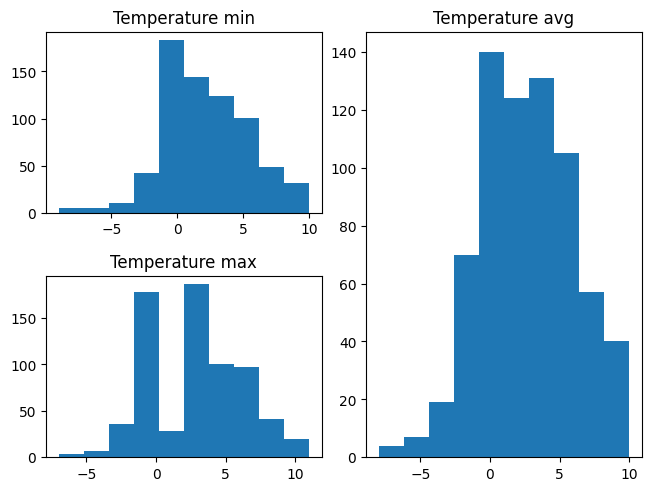

In [ ]:
fig, axd = plt.subplot_mosaic([['min', 'avg'],
                               ['max', 'avg']], layout='constrained')
axd['min'].set_title('Temperature min')
axd['max'].set_title('Temperature max')
axd['avg'].set_title('Temperature avg')

axd['min'].hist(minparameter_values.astype(int))
axd['max'].hist(maxparameter_values.astype(int))
axd['avg'].hist(avgparameter_values.astype(int))

NameError: name 'rh_avg_values' is not defined

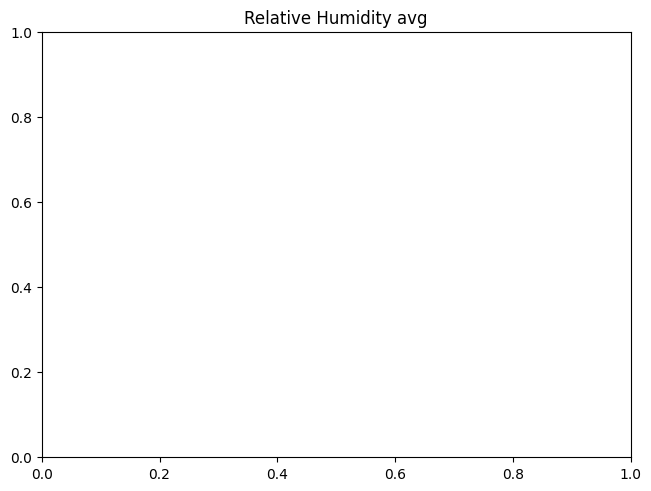

In [19]:
fig, axd_rh = plt.subplot_mosaic([['avg']], layout='constrained')

axd_rh['avg'].set_title('Relative Humidity avg')
axd_rh['avg'].hist(rh_avg_values.astype(int))

### Apologies for the incomplete matplotlib visualization. Unfortunately, due to time constraints and the pressure of mid-term deadlines, I couldn't devote as much attention to it as I would have liked. Given more time and freedom from these current obligations, I am confident I could produce a more polished and comprehensive result. Appreciate your understanding. 
